Directo (U1 Introducci√≥n a la Inteligencia Artificial, U2 Resoluci√≥n de Problemas y B√∫squeda) Fundamentos de IA

Un problema de b√∫squeda es encontrar una secuencia de acciones que lleve del estado inicial a un estado objetivo, optimizando (minimizando) el costo del camino cuando sea necesario.

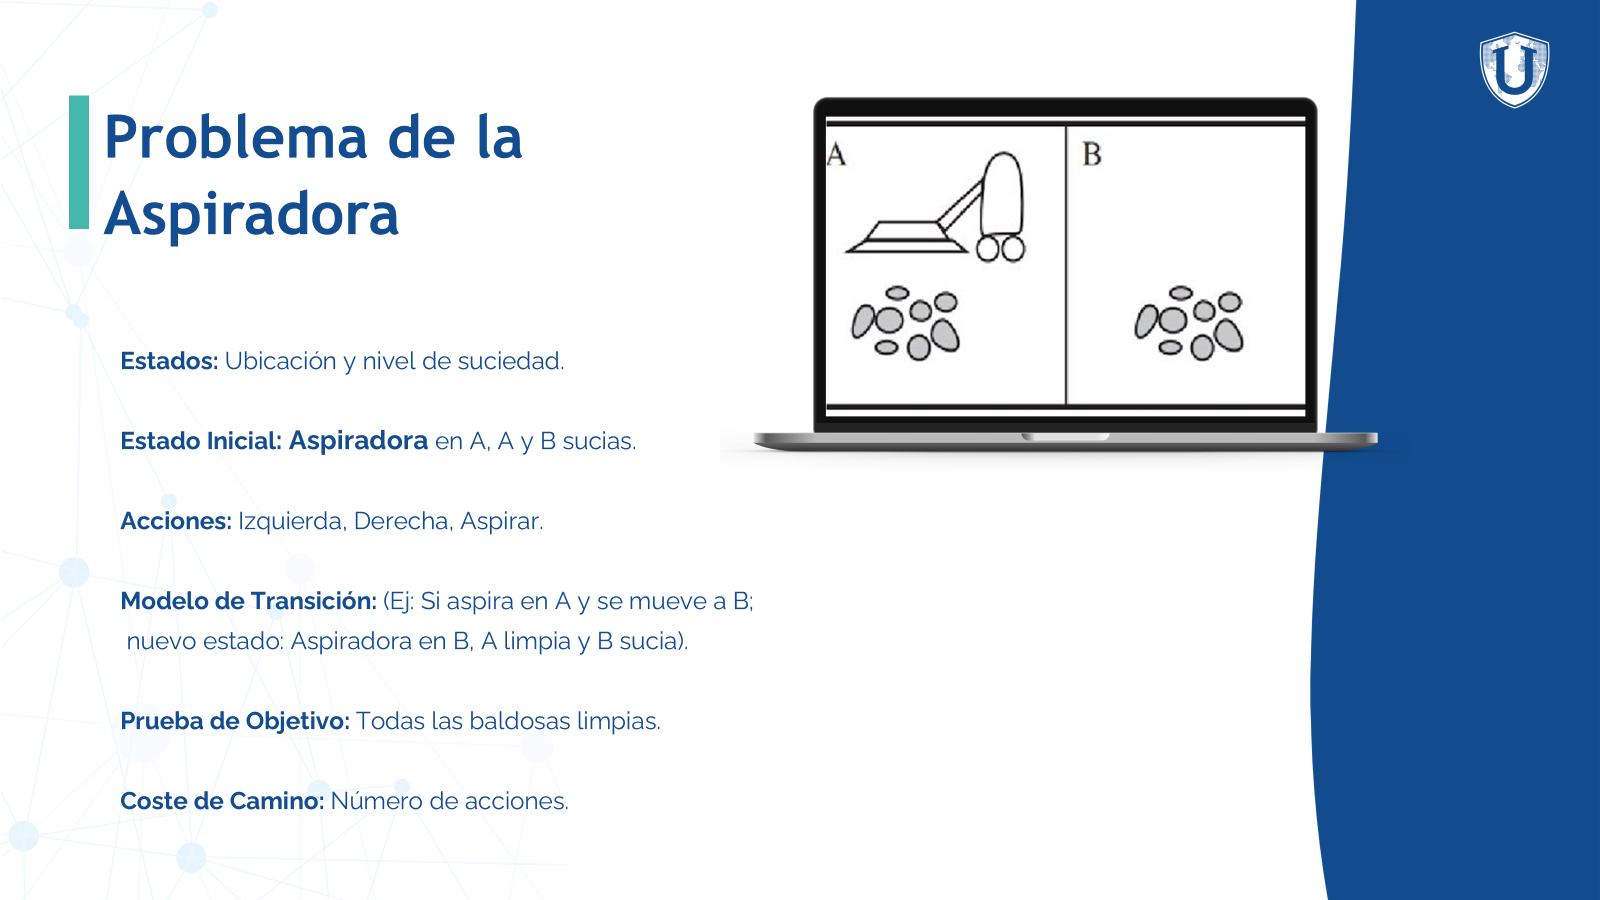

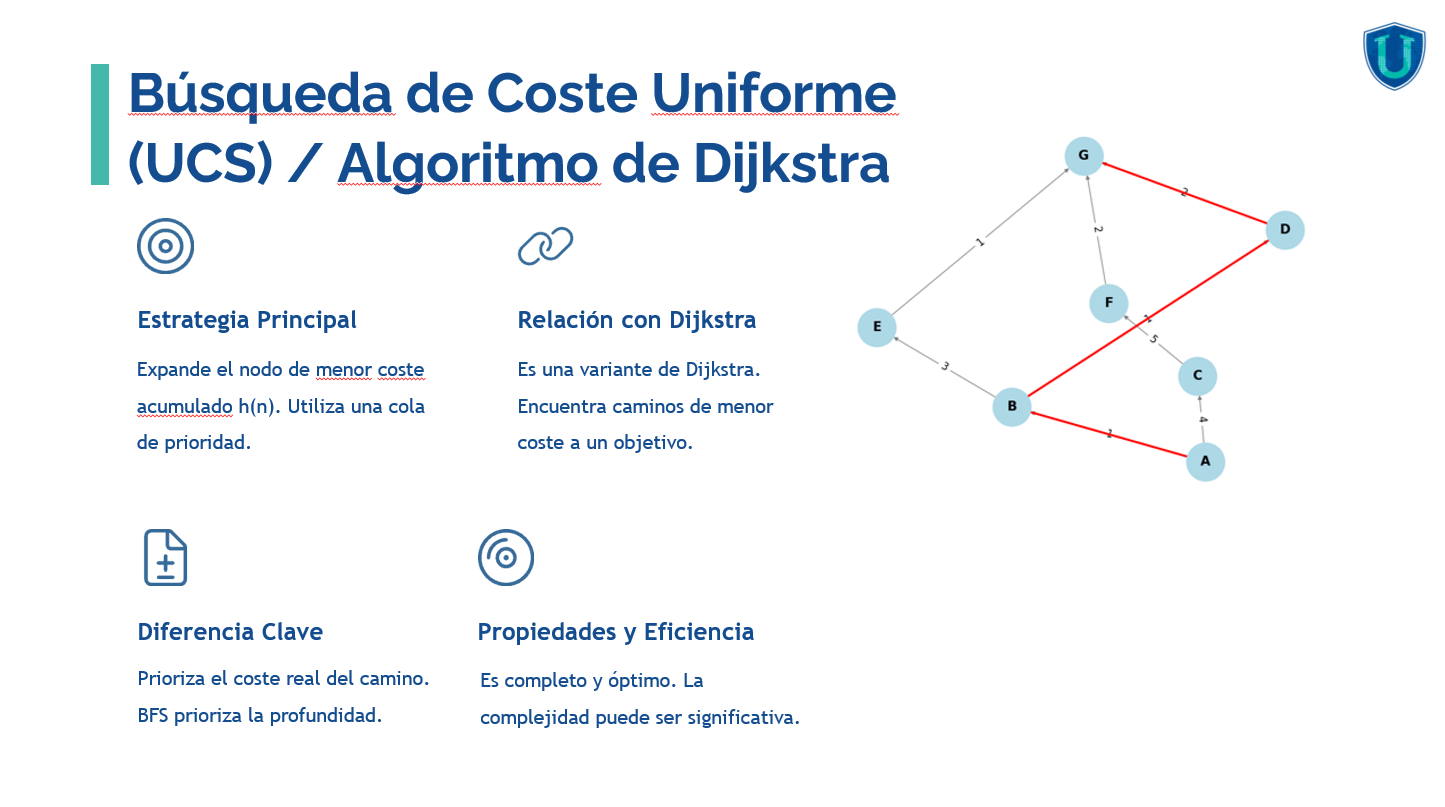

# Problema de B√∫squeda en Grafo A-G

## Estados
Nodo actual donde se encuentra el agente (A, B, C, D, E, F, o G)

## Estado Inicial
El agente est√° en el nodo A

## Acciones
**Moverse**: Desplazarse a un nodo adyacente seg√∫n las conexiones del grafo:
- Desde A: puede ir a B o C
- Desde B: puede ir a D o E  
- Desde C: puede ir a F
- Desde D: puede ir a G
- Desde E: puede ir a G
- Desde F: puede ir a G
- Desde G: no hay movimientos posibles (nodo terminal)

## Modelo de Transici√≥n
**Ejemplo**: Si el agente est√° en B:
- Si se mueve a D ‚Üí nuevo estado: agente en D
- Si se mueve a E ‚Üí nuevo estado: agente en E

## Prueba de Objetivo
El agente ha llegado al nodo G

## Coste de Camino
Suma de los pesos de las aristas recorridas:
- A‚ÜíB: costo 1
- A‚ÜíC: costo 4
- B‚ÜíD: costo 1
- B‚ÜíE: costo 3
- C‚ÜíF: costo 5
- D‚ÜíG: costo 2
- E‚ÜíG: costo 1
- F‚ÜíG: costo 2

1 B
4 C
2 D
4 E
4 G
9 F
Camino de coste m√≠nimo de A a G: A -> B -> D -> G con coste total 4


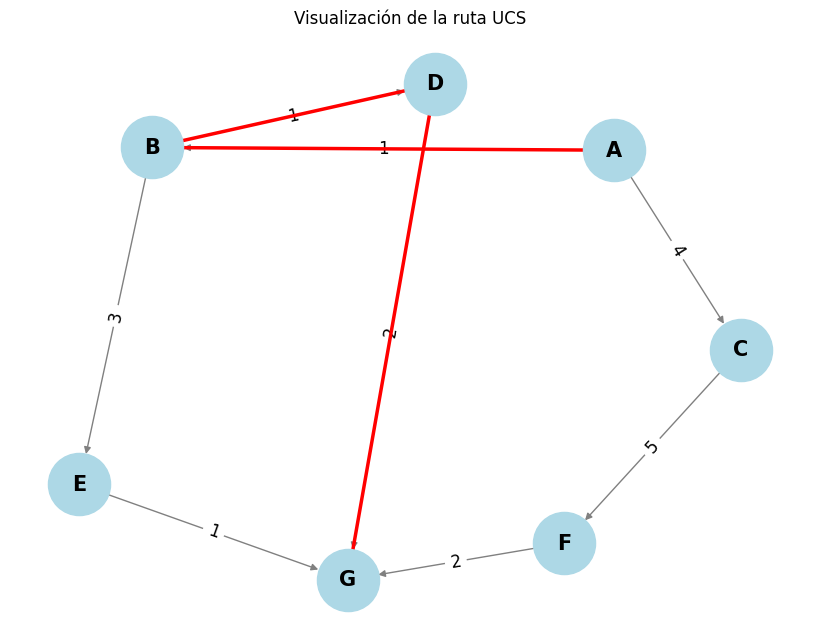

In [ ]:
import heapq  # Para manejar la cola de prioridad (heap)
import networkx as nx  # Librer√≠a para grafos
import matplotlib.pyplot as plt  # Para visualizaci√≥n del grafo

def uniform_cost_search(graph, start, goal):
    # Cola de prioridad para los nodos fronterizos, iniciada con el nodo de inicio y coste 0
    priority_queue = [(0, start)]
    # Diccionario para almacenar el coste m√°s bajo conocido a cada nodo y su nodo predecesor
    visited = {start: (0, None)}

    # Mientras queden nodos por explorar
    while priority_queue:
        # Extraer el nodo con menor coste acumulado
        current_cost, current_node = heapq.heappop(priority_queue)

        # Si hemos llegado al nodo objetivo, reconstruir y devolver ruta y coste total
        if current_node == goal:
            return current_cost, reconstruct_path(visited, start, goal)

        # Explorar cada vecino del nodo actual
        for neighbor, cost in graph[current_node]:
            total_cost = current_cost + cost  # Coste acumulado hasta el vecino

            # Si el vecino no ha sido visitado o encontramos un camino m√°s barato
            if neighbor not in visited or total_cost < visited[neighbor][0]:
                # Guardar el nuevo coste y el nodo desde el que llegamos
                visited[neighbor] = (total_cost, current_node)
                # A√±adir el vecino a la cola de prioridad con su coste actualizado
                heapq.heappush(priority_queue, (total_cost, neighbor))
                print(total_cost, neighbor)

    # Si no se puede alcanzar el objetivo, devolver None
    return None


def reconstruct_path(visited, start, goal):
    # Reconstruir la ruta desde el inicio hasta el objetivo usando los predecesores
    path = []
    current = goal
    while current is not None:
        path.append(current)
        # Avanzar al nodo predecesor
        current = visited[current][1]

    path.reverse()  # Invertir para tener el orden inicio->objetivo
    return path


def visualize_graph(graph, path=None):
    # Crear un grafo dirigido
    G = nx.DiGraph()

    # A√±adir nodos y aristas al grafo con sus costes (pesos)
    for node, edges in graph.items():
        for neighbor, cost in edges:
            G.add_edge(node, neighbor, weight=cost)

    # Calcular posiciones para la visualizaci√≥n
    pos = nx.spring_layout(G)

    # Dibujar el grafo con etiquetas de nodos y aristas
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000,
            font_size=15, font_weight='bold', edge_color='gray')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=12)

    # Si se proporciona una ruta, resaltarla en color rojo
    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2.5)

    plt.title("Visualizaci√≥n de la ruta UCS")
    plt.show()

# Ejemplo de grafo representado como lista de adyacencia
graph = {
    'A': [('B', 1), ('C', 4)],
    'B': [('D', 1), ('E', 3)],
    'C': [('F', 5)],
    'D': [('G', 2)],
    'E': [('G', 1)],
    'F': [('G', 2)],
    'G': []
}

# Uso de ejemplo de la funci√≥n uniform_cost_search
start_node = 'A'
goal_node = 'G'
result = uniform_cost_search(graph, start_node, goal_node)

if result:
    total_cost, path = result
    print(f"Camino de coste m√≠nimo de {start_node} a {goal_node}: {' -> '.join(path)} con coste total {total_cost}")
    visualize_graph(graph, path)
else:
    print(f"No se encontr√≥ ruta de {start_node} a {goal_node}")


Least cost path from A to E: A -> B -> E with total cost 4


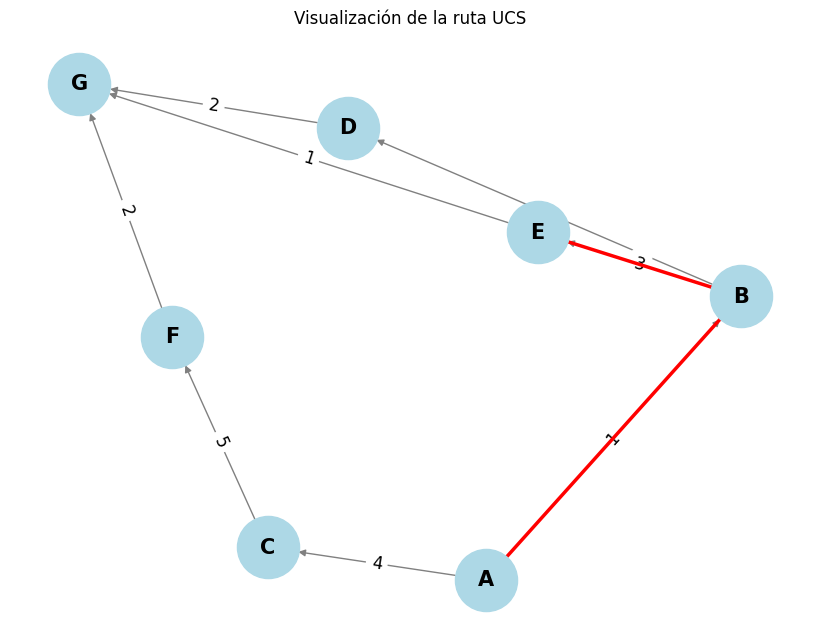

In [ ]:
# Uso de ejemplo de la funci√≥n uniform_cost_search
start_node = 'A'
goal_node = 'E'
result = uniform_cost_search(graph, start_node, goal_node)

if result:
    total_cost, path = result
    print(f"Least cost path from {start_node} to {goal_node}: {' -> '.join(path)} with total cost {total_cost}")
    visualize_graph(graph, path)
else:
    print(f"No path found from {start_node} to {goal_node}")

########################### MinMax ##########################

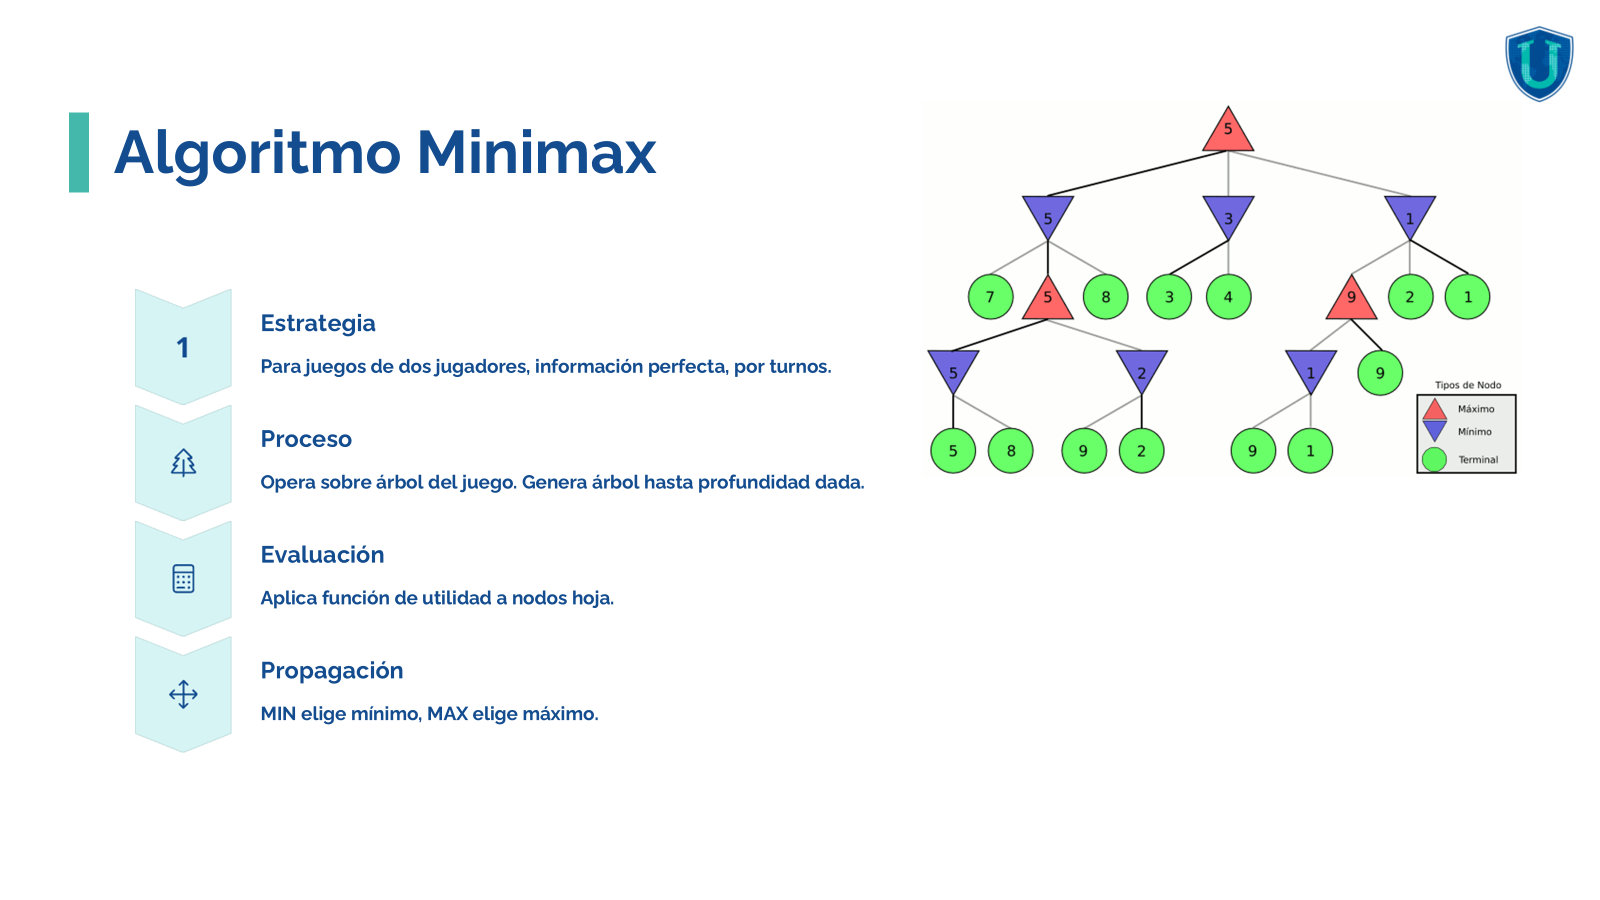

# Problema de Tic-Tac-Toe con Minimax

## Estados
**Configuraci√≥n actual del tablero** representado como lista de 9 elementos:
- `0`: casilla vac√≠a
- `1` (MAX): ficha del ordenador (X)
- `-1` (MIN): ficha del humano (O)

**Mapeo de posiciones**:
```
0 | 1 | 2     ‚Üí    1 | 2 | 3
---------           ---------
3 | 4 | 5     ‚Üí    4 | 5 | 6  (interfaz usuario)
---------           ---------
6 | 7 | 8     ‚Üí    7 | 8 | 9
```

**Ejemplo de estado**: [0, 1, -1, 0, 0, 0, 0, 0, 0] representa un tablero con X en posici√≥n 2 y O en posici√≥n 3

## Estado Inicial
Tablero completamente vac√≠o: [0, 0, 0, 0, 0, 0, 0, 0, 0]

## Acciones
**Colocar ficha**: Poner la ficha del jugador actual en una casilla vac√≠a (posici√≥n con valor 0)
- Jugador MAX (ordenador): coloca 1 (X)
- Jugador MIN (humano): coloca -1 (O)
- Acciones v√°lidas: √≠ndices de las posiciones que contienen 0

## Modelo de Transici√≥n
**Ejemplo 1**: Si el estado actual es [0, 1, 0, 0, 0, 0, 0, 0, 0] y es turno del jugador MIN:
- Si coloca ficha en posici√≥n 0 ‚Üí nuevo estado: [-1, 1, 0, 0, 0, 0, 0, 0, 0]
- Si coloca ficha en posici√≥n 2 ‚Üí nuevo estado: [0, 1, -1, 0, 0, 0, 0, 0, 0]
- Si coloca ficha en posici√≥n 3 ‚Üí nuevo estado: [0, 1, 0, -1, 0, 0, 0, 0, 0]

**Ejemplo 2 - Estado Terminal (Fila)**: Si el estado actual es [1, 1, 0, 0, 0, 0, 0, 0, 0] y es turno del jugador MAX:
- Si coloca ficha en posici√≥n 2 ‚Üí nuevo estado: [1, 1, 1, 0, 0, 0, 0, 0, 0] ‚úÖ **Victoria de MAX (fila superior)**
- Si coloca ficha en posici√≥n 3 ‚Üí nuevo estado: [1, 1, 0, 1, 0, 0, 0, 0, 0] (juego contin√∫a)

**Ejemplo 3 - Estado Terminal (Diagonal)**: Si el estado actual es [1, 0, 0, 0, 1, 0, 0, 0, 0] y es turno del jugador MAX:
- Si coloca ficha en posici√≥n 8 ‚Üí nuevo estado: [1, 0, 0, 0, 1, 0, 0, 0, 1] ‚úÖ **Victoria de MAX (diagonal principal)**

```
X |   |   
---------
  | X |   
---------
  |   | X
```
```python
# Esto es lo que realmente eval√∫a:
condicion = (valor_pos_0 == valor_pos_4) and (valor_pos_4 == valor_pos_8) and (valor_pos_8 != 0)

# Sustituyendo valores:
condicion = (1 == 1) and (1 == 1) and (1 != 0)
condicion = True and True and True
condicion = True
```
- Si coloca ficha en posici√≥n 1 ‚Üí nuevo estado: [1, 1, 0, 0, 1, 0, 0, 0, 0] (juego contin√∫a)

```
X | X |   
---------
  | X |   
---------
  |   |   
```

    ganador_actual = tablero[0]
## Prueba de Objetivo
El juego termina cuando se cumple alguna de estas condiciones:
- **Victoria**: Tres fichas iguales en l√≠nea (fila, columna o diagonal)
- **Empate**: Tablero completo sin ganador

## Funci√≥n de Evaluaci√≥n
**Valores de utilidad**:
- +1: Victoria del ordenador (MAX)
- -1: Victoria del humano (MIN)  
- 0: Empate

## Criterio de Optimizaci√≥n
- **Jugador MAX (ordenador)**: Maximiza la utilidad (busca +1, evita -1)
- **Jugador MIN (humano)**: Minimiza la utilidad (busca -1, evita +1)
- **Algoritmo**: Minimax con alternancia de turnos entre MAX y MIN

In [ ]:
import sys

MAX = 1      # Constante para el jugador m√°quina (X)
MIN = -1     # Constante para el jugador humano (O)
jugada_maquina = 0  # Guardar√° el √≠ndice de la jugada elegida por la IA

def minimax(tablero, jugador):
    global jugada_maquina

    # Caso terminal: si el juego ha terminado (victoria o empate)
    if game_over(tablero):
        # Retorna ganador (1, -1 o 0) y puntuaci√≥n cero en nodos terminales
        return [ganador(tablero), 0]

    # Lista para almacenar [valor, √≠ndice] de cada posible movimiento
    movimientos = []
    # Explorar todas las posiciones libres en el tablero
    for jugada in range(len(tablero)):
        if tablero[jugada] == 0:
            # Simular la jugada en una copia del tablero
            tableroaux = tablero[:]
            tableroaux[jugada] = jugador
            # Llamada recursiva alternando jugador
            puntuacion = minimax(tableroaux, -jugador)
            # Guardar la evaluaci√≥n y el √≠ndice
            movimientos.append([puntuacion[0], jugada])

    # Si es el turno de la IA (MAX), escoger el movimiento con valor m√°ximo
    if jugador == MAX:
        movimiento = max(movimientos)
        jugada_maquina = movimiento[1]  # Registrar √≠ndice de la mejor jugada
        return movimiento
    else:
        # Si es el turno del humano (MIN), escoger el movimiento con valor m√≠nimo
        movimiento = min(movimientos)
        return movimiento


def game_over(tablero):
    # Verifica si hay casillas vac√≠as; si no hay, podr√≠a ser empate
    quedan_casillas = any(casilla == 0 for casilla in tablero)

    # Si no hay ganador y a√∫n quedan casillas libres, el juego contin√∫a
    if ganador(tablero) == 0 and quedan_casillas:
        return False
    # En otro caso (victoria o empate sin vacantes), el juego ha terminado
    return True


def ganador(tablero):
    # Define las l√≠neas ganadoras posibles (filas, columnas y diagonales)
    lineas = [
        [0,1,2], [3,4,5], [6,7,8],     # Filas
        [0,3,6], [1,4,7], [2,5,8],     # Columnas
        [0,4,8], [2,4,6]               # Diagonales
    ]
    ganador_actual = 0
    # Recorrer cada l√≠nea y verificar si los tres valores son iguales y no cero
    for linea in lineas:
        if tablero[linea[0]] == tablero[linea[1]] == tablero[linea[2]] != 0:
            ganador_actual = tablero[linea[0]]
    return ganador_actual  # Puede ser 1, -1 o 0 (empate / sin ganador)


def ver_tablero(tablero):
    # Imprime el tablero en consola con separadores
    print("\n" + "="*15)
    for i in range(3):
        print("| ", end="")
        for j in range(3):
            valor = tablero[i*3 + j]
            if valor == MAX:
                print('X', end=' | ')
            elif valor == MIN:
                print('O', end=' | ')
            else:
                # Muestra n√∫mero de posici√≥n para casillas vac√≠as
                print(str(i*3 + j + 1), end=' | ')
        print()
        if i < 2:
            print("-" * 15)
    print("="*15)


def juega_humano(tablero):
    # Gesti√≥n del turno del jugador humano
    ok = False
    while not ok:
        try:
            print("\nTu turno (juegas con O)")
            casilla = input("Escoge casilla (1-9) o 'q' para salir: ").strip().lower()

            if casilla == 'q':
                print("¬°Gracias por jugar!")
                return None  # Se√±ala salida voluntaria

            casilla = int(casilla)
            # Comprobar rango v√°lido y casilla desocupada
            if 1 <= casilla <= 9 and tablero[casilla-1] == 0:
                tablero[casilla-1] = MIN
                ok = True
            else:
                print("‚ùå Casilla inv√°lida o ya ocupada. Intenta de nuevo.")
        except ValueError:
            print("‚ùå Por favor ingresa un n√∫mero del 1-9 o 'q' para salir.")
    return tablero  # Retorna el tablero actualizado


def juega_ordenador(tablero):
    # Ejecuta el turno de la IA usando minimax
    global jugada_maquina
    print("ü§ñ Turno del ordenador (juega con X)...")
    _ = minimax(tablero[:], MAX)  # Calcula la mejor jugada
    tablero[jugada_maquina] = MAX
    print(f"El ordenador eligi√≥ la casilla {jugada_maquina + 1}")
    return tablero


def main():
    # Funci√≥n principal que inicia y controla el flujo del juego
    print("üéÆ ¬°BIENVENIDO AL TIC TAC TOE!")
    print("T√∫ juegas con 'O' y el ordenador con 'X'")
    print("Los n√∫meros en el tablero muestran las posiciones disponibles")

    tablero = [0] * 9  # Tablero inicial vac√≠o

    while True:
        ver_tablero(tablero)

        # Turno humano
        resultado = juega_humano(tablero)
        if resultado is None:  # Si el jugador decide salir
            break
        tablero = resultado
        # Verificar si termin√≥ tras turno humano
        if game_over(tablero):
            break

        # Turno ordenador
        tablero = juega_ordenador(tablero)
        if game_over(tablero):
            break

    # Mostrar resultado final
    if tablero:
        ver_tablero(tablero)
        g = ganador(tablero)
        if g == 0:
            print("ü§ù ¬°EMPATE! Buen juego.")
        elif g == MIN:
            print("üéâ ¬°FELICIDADES! ¬°Has ganado!")
        else:
            print("ü§ñ El ordenador ha ganado!")

# Ejecutar el juego si el script se ejecuta directamente
if __name__ == "__main__":
    main()


üéÆ ¬°BIENVENIDO AL TIC TAC TOE!
T√∫ juegas con 'O' y el ordenador con 'X'
Los n√∫meros en el tablero muestran las posiciones disponibles

| 1 | 2 | 3 | 
---------------
| 4 | 5 | 6 | 
---------------
| 7 | 8 | 9 | 

Tu turno (juegas con O)
Escoge casilla (1-9) o 'q' para salir: 1
ü§ñ Turno del ordenador (juega con X)...
El ordenador eligi√≥ la casilla 5

| O | 2 | 3 | 
---------------
| 4 | X | 6 | 
---------------
| 7 | 8 | 9 | 

Tu turno (juegas con O)
Escoge casilla (1-9) o 'q' para salir: 3
ü§ñ Turno del ordenador (juega con X)...
El ordenador eligi√≥ la casilla 2

| O | X | O | 
---------------
| 4 | X | 6 | 
---------------
| 7 | 8 | 9 | 

Tu turno (juegas con O)
Escoge casilla (1-9) o 'q' para salir: 8
ü§ñ Turno del ordenador (juega con X)...
El ordenador eligi√≥ la casilla 9

| O | X | O | 
---------------
| 4 | X | 6 | 
---------------
| 7 | O | X | 

Tu turno (juegas con O)
Escoge casilla (1-9) o 'q' para salir: 6
ü§ñ Turno del ordenador (juega con X)...
El ordenador el